{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

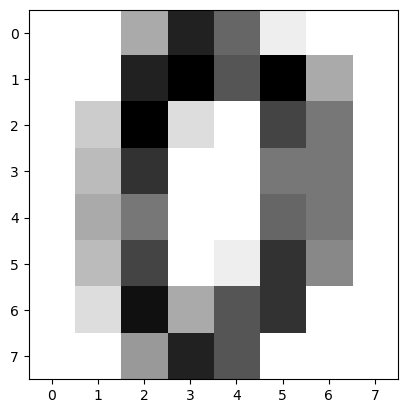

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

digits

In [2]:
X = digits.data

X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:
y = digits.target

y

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
from tensorflow.keras.utils import to_categorical

trainy = y 
trainy_one_hot = to_categorical(trainy)
Y = trainy_one_hot

Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [6]:
# 훈련, 테스트 데이터로 데이터 나누기 (8:2비율)
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [7]:
# 훈련, 테스트 데이터 형태 확인 : (샘플개수, 특성개수)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437, 10), (360, 10))

In [8]:
# 모델 설계
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()


model.add(Dense(10,input_shape=(64,),activation='relu')) 
model.add(Dense(8,activation='relu'))   # 은닉층
model.add(Dense(6,activation='relu'))
model.add(Dense(10,activation='softmax'))    # 출력층

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])    # 모델 컴파일

model.summary() # 모델 구조 요약

c:\Users\tjdgu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │            70 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 862 (3.37 KB)

 Trainable params: 862 (3.37 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
# 30번 반복학습, 한번에 32개씩 학습, 학습 중간중간 테스트 테이터로 성능 확인


Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1306 - loss: 5.6001 - val_accuracy: 0.1000 - val_loss: 2.7448
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1059 - loss: 2.5372 - val_accuracy: 0.1306 - val_loss: 2.2590
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1493 - loss: 2.1672 - val_accuracy: 0.2139 - val_loss: 2.0352
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2062 - loss: 1.9958 - val_accuracy: 0.2889 - val_loss: 1.8749
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2664 - loss: 1.8207 - val_accuracy: 0.3583 - val_loss: 1.7309
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3178 - loss: 1.6844 - val_accuracy: 0.4417 - val_loss: 1.5979
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4372 - loss: 1.5396 - val_accuracy: 0.5028 - val_loss: 1.4685
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4998 - loss: 1.4124 - val_accuracy: 0.5250 - val_loss:

In [10]:
import numpy as np

y_pred = model.predict(X_test)  # 테스트데이터로 예측
y_test_class = np.argmax(y_test,axis=1) # 원핫인코딩 -> 정답 클래스 번호로 변환
y_pred_class = np.argmax(y_pred,axis=1) # 원핫인코딩 -> 예측값 클래스 번호로 변환

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


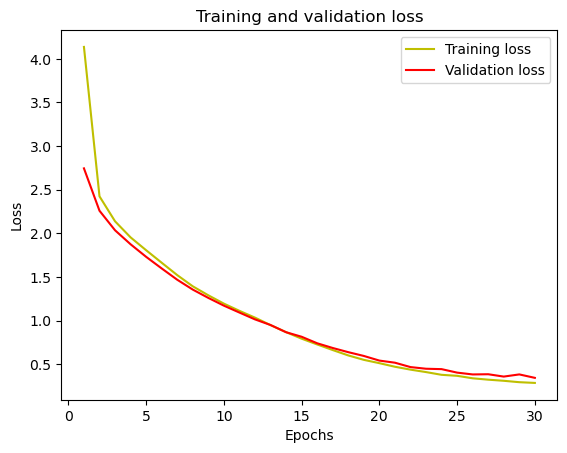

In [11]:
# 손실값 시각화
import matplotlib.pyplot as plt

loss =model_history.history['loss'] # 훈련 데이터에서의 손실값
val_loss =model_history.history['val_loss'] # 테스트 데이터에서의 손실값
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

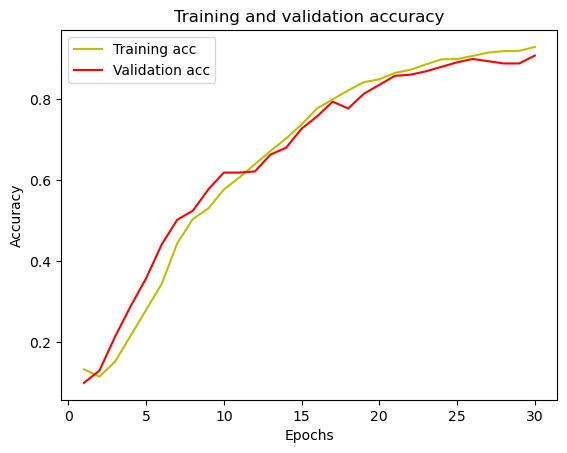

In [12]:
# 정확도 시각화
acc =model_history.history['accuracy']  # 학습용 정확도
val_acc =model_history.history['val_accuracy']  #테스트용 정확도
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
# 모델 평가
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.77      0.94      0.85        35
           2       0.91      0.86      0.89        36
           3       0.93      0.93      0.93        29
           4       1.00      0.93      0.97        30
           5       0.86      0.95      0.90        40
           6       1.00      0.89      0.94        44
           7       0.92      0.87      0.89        39
           8       0.89      0.87      0.88        39
           9       0.95      0.90      0.93        41

    accuracy                           0.91       360
   macro avg       0.91      0.91      0.91       360
weighted avg       0.91      0.91      0.91       360

[[26  0  0  0  0  0  0  0  1  0]
 [ 0 33  1  0  0  0  0  0  1  0]
 [ 0  0 31  0  0  1  0  2  2  0]
 [ 0  0  0 27  0  1  0  0  0  1]
 [ 0  2  0  0 28  0  0  0  0  0]
 [ 0  1  0  0  0 38  0  0  0  1]
 [ 3  2  0  0  0  0 39  0  0  0]
 [ 0  2  0